# Time series day 1 - Exercises

## Exercise 1

#### Question 1
##### Import the libraries we will be using for the day.
##### Set the working directory as the data directory.


In [1]:
import os
import pandas as pd
from pandas.plotting import lag_plot
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
nb_root=globals()['_dh']
os.chdir(nb_root[0])

main_dir = os.path.abspath(os.path.join ("..",))

# Make `data_dir` and 'path_dir' from the `main_dir` and
data_dir = os.path.join(main_dir, "data")
plot_dir = os.path.join(main_dir, "plot")

# Set working directory.
os.chdir(data_dir)
# Check working directory.
print(os.getcwd())

/Users/datasociety/Desktop/af-werx/data


#### Question 2
##### Read in the passenger miles dataset as `passenger_miles_ex` and print the head.
##### Rename the columns to `['date', 'revenue_passenger_miles', 'available_seat_miles', 'unused_seat_miles']`.
##### Print the data types of all the columns of the dataframe.

In [3]:
# Read csv file into `passenger_miles` variable.
passenger_miles_ex = pd.read_csv(data_dir + "/passenger_miles.csv")
passenger_miles_ex.head()

,Date,Revenue Passenger Miles,Available Seat Miles,Unused Seat Miles
0,1979-1,15.50,26.64,11.15
1,1979-2,16.58,27.20,10.62
2,1979-3,18.85,27.87,9.02
3,1979-4,17.23,23.22,5.99
4,1979-5,16.04,23.27,7.23


In [4]:
passenger_miles_ex.columns = ['date',
                           'revenue_passenger_miles',
                           'available_seat_miles',
                           'unused_seat_miles']
passenger_miles_ex.columns

Index(['date', 'revenue_passenger_miles', 'available_seat_miles',
       'unused_seat_miles'],
      dtype='object')

In [5]:
passenger_miles_ex.dtypes

date                        object
revenue_passenger_miles    float64
available_seat_miles       float64
unused_seat_miles          float64
dtype: object

#### Question 3
##### Convert date column to datetime format: YYYY-MM.
##### Print the data type of columns and the head after the conversion.

In [6]:
# Convert `date` column to datetime format: YYYY-MM.
passenger_miles_ex['date'] = pd.to_datetime(passenger_miles_ex['date'], 
                                         format = "%Y-%m")
print(passenger_miles_ex.dtypes)
passenger_miles_ex.head()


date                       datetime64[ns]
revenue_passenger_miles           float64
available_seat_miles              float64
unused_seat_miles                 float64
dtype: object


,date,revenue_passenger_miles,available_seat_miles,unused_seat_miles
0,1979-01-01,15.50,26.64,11.15
1,1979-02-01,16.58,27.20,10.62
2,1979-03-01,18.85,27.87,9.02
3,1979-04-01,17.23,23.22,5.99
4,1979-05-01,16.04,23.27,7.23


#### Question 4
##### Visualize the time series plot of `available_seat_miles`.
##### Set the index to `date` column first before plotting the series.
##### Set the figure size to be 15 units wide and 10 units high.
##### Set `xlabel` to 'Date' with font size 18.
##### Set `ylabel` to 'Overall capacity' with font size 20.
##### Set `tick_params` of the axis object to have label size of 14.

In [7]:
passenger_miles_ex.head(10)

,date,revenue_passenger_miles,available_seat_miles,unused_seat_miles
0,1979-01-01,15.50,26.64,11.15
1,1979-02-01,16.58,27.20,10.62
2,1979-03-01,18.85,27.87,9.02
3,1979-04-01,17.23,23.22,5.99
4,1979-05-01,16.04,23.27,7.23
5,1979-06-01,19.11,27.30,8.19
6,1979-07-01,19.88,29.28,9.40
7,1979-08-01,21.47,31.23,9.76
8,1979-09-01,16.55,28.55,12.00
9,1979-10-01,16.55,27.84,11.28


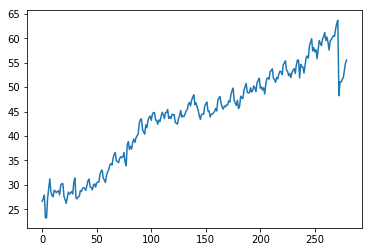

In [8]:
# Plot series.
passenger_miles_ex['available_seat_miles'].plot()
plt.show()

In [9]:
# Set index of the dataframe to `date` column.
passenger_miles_ex.set_index('date',
                             inplace = True)
passenger_miles_ex.head()

,revenue_passenger_miles,available_seat_miles,unused_seat_miles
date,,,
1979-01-01,15.50,26.64,11.15
1979-02-01,16.58,27.20,10.62
1979-03-01,18.85,27.87,9.02
1979-04-01,17.23,23.22,5.99
1979-05-01,16.04,23.27,7.23


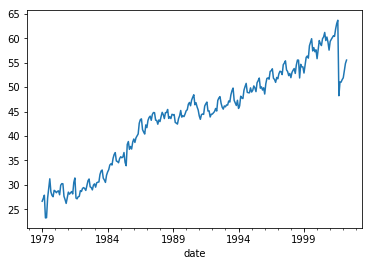

In [10]:
# Notice that the x-axis automatically changed to a date!
passenger_miles_ex['available_seat_miles'].plot()
plt.show()

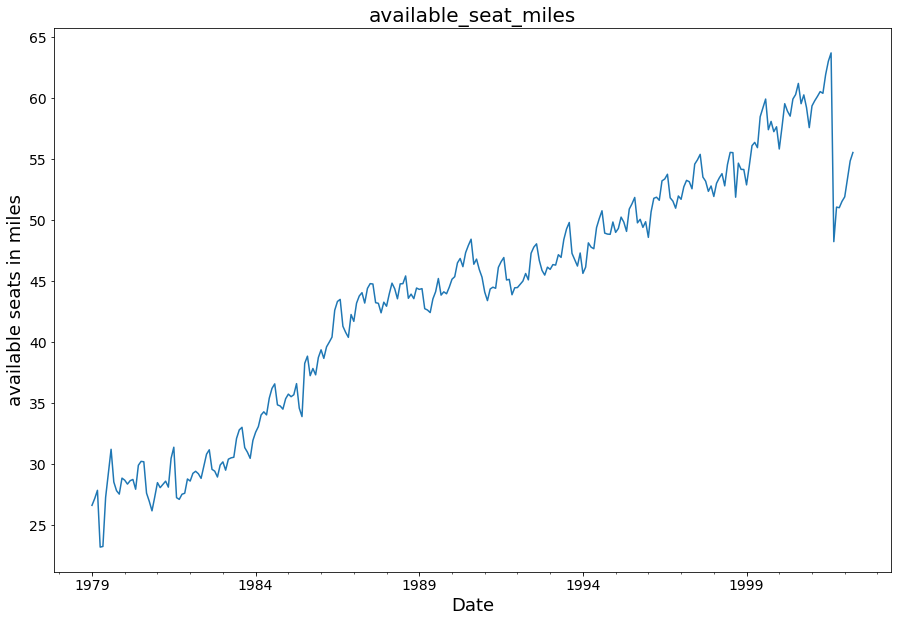

In [11]:
fig, ax = plt.subplots(figsize = (15, 10))
passenger_miles_ex['available_seat_miles'].plot()
plt.title('available_seat_miles',
          fontsize = 20)
plt.xlabel('Date', 
           fontsize = 18)
plt.ylabel('available seats in miles', 
           fontsize = 18)
ax.tick_params(labelsize = 14)
plt.show()

#### Question 5
##### What can you tell about the plot?

In [12]:
print('they are related!!')

they are related!!


## Exercise 2

#### Question 1
##### Create a lag plot of available seat miles.
##### What can you infer from the plot?

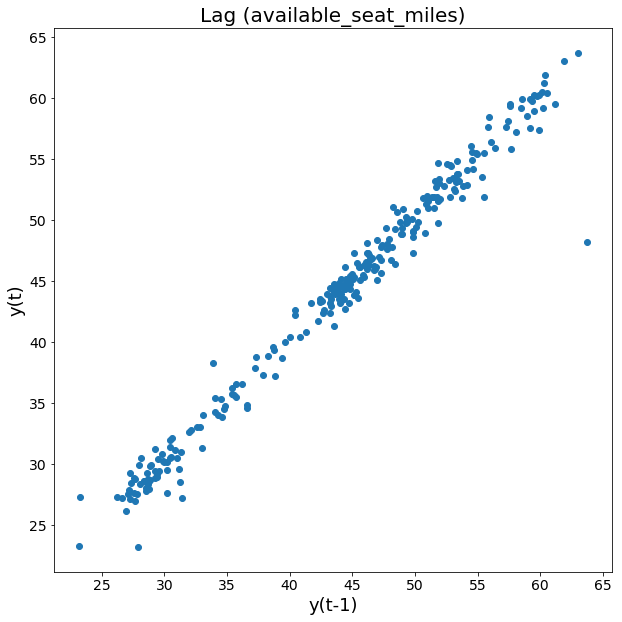

In [13]:
fig, ax = plt.subplots(figsize = (10, 10))
# Plot lag (default is 1).
lag_plot(passenger_miles_ex['available_seat_miles'])
plt.title('Lag (available_seat_miles)',
          fontsize = 20)
plt.xlabel('y(t-1)', fontsize = 18)
plt.ylabel('y(t)', fontsize = 18)
ax.tick_params(labelsize = 14)
plt.show()

#### Question 2
##### Visualize the plot with `k = 2`
##### What can you infer?

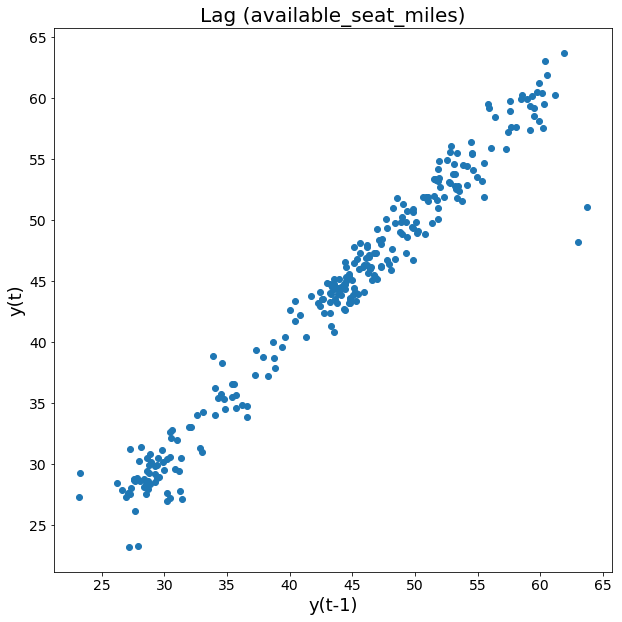

In [14]:
fig, ax = plt.subplots(figsize = (10, 10))
# Plot lag (default is 1).
lag_plot(passenger_miles_ex['available_seat_miles'],
        lag = 2)
plt.title('Lag (available_seat_miles)',
          fontsize = 20)
plt.xlabel('y(t-1)', fontsize = 18)
plt.ylabel('y(t)', fontsize = 18)
ax.tick_params(labelsize = 14)
plt.show()

#### Question 3
##### Visualize the lag plot with available seat miles with maximum lag.
##### Keep max lag about 1/5th of the total observations.

280
56


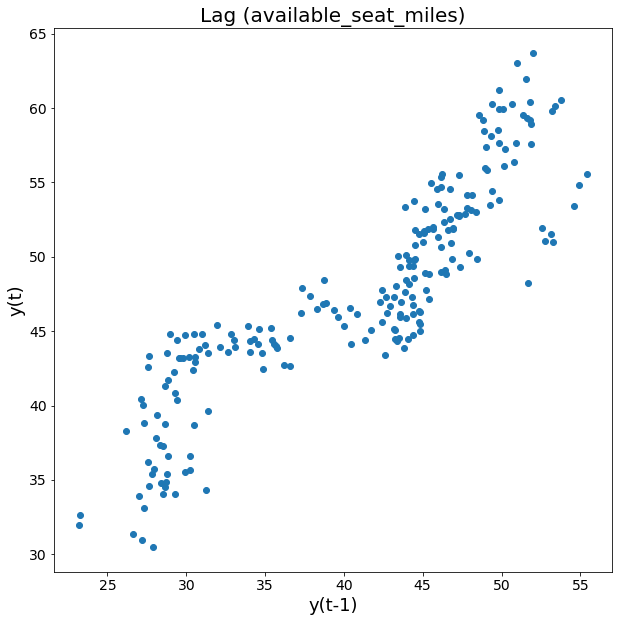

In [15]:
max_k = passenger_miles_ex.shape[0]//5
print(passenger_miles_ex.shape[0])
print(max_k)
fig, ax = plt.subplots(figsize = (10, 10))
# Plot lag (default is 1).
lag_plot(passenger_miles_ex['available_seat_miles'],
        lag = max_k)
plt.title('Lag (available_seat_miles)',
          fontsize = 20)
plt.xlabel('y(t-1)', fontsize = 18)
plt.ylabel('y(t)', fontsize = 18)
ax.tick_params(labelsize = 14)
plt.show()

#### Question 4
##### Estimate the autocorrelation for our dataset. 

In [16]:
# Let's compute autocorrelation values for the passenger miles data.
acf_values = acf(passenger_miles_ex['available_seat_miles'],
                 nlags = max_k) #<- set lag to max number of lags
print(acf_values)
len(acf_values) # lags 0 to max

[1.         0.98075407 0.9648337  0.95192092 0.94077068 0.92789322
 0.91967855 0.91314768 0.91144733 0.89973851 0.88981152 0.87959681
 0.87134763 0.85463857 0.83904908 0.82480247 0.81458455 0.8021797
 0.79139628 0.78098254 0.7724814  0.7584239  0.74799242 0.73646151
 0.72638039 0.70884473 0.69209032 0.67733491 0.66708287 0.65273054
 0.64204378 0.6320442  0.62136548 0.6063419  0.59471206 0.58375266
 0.57644893 0.55991009 0.54403937 0.52948477 0.51923207 0.50584782
 0.49478973 0.48436002 0.47660432 0.4642833  0.45454794 0.44392347
 0.43563408 0.42007852 0.40458004 0.39037916 0.38007415 0.36741258
 0.35758972 0.34742715 0.33799204]


57

#### Question 5
##### Visualize the ACF values.
##### Adjust the lags to max lags and label the axis.

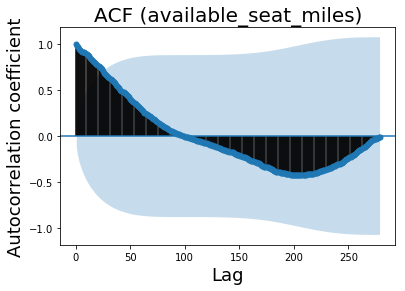

In [17]:
# Autocorrelation function (ACF) plot.
plot_acf(passenger_miles_ex['available_seat_miles'])
plt.title('ACF (available_seat_miles)',
          fontsize = 20)
plt.xlabel('Lag', fontsize = 18)
plt.ylabel('Autocorrelation coefficient',
           fontsize = 18)
ax.tick_params(labelsize = 14)
plt.show()


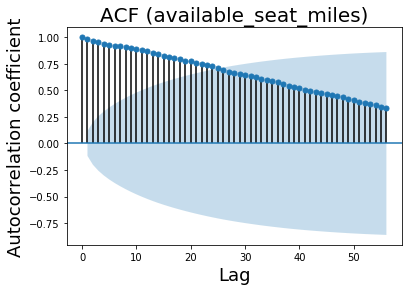

In [18]:
# Autocorrelation function (ACF) plot.
plot_acf(passenger_miles_ex['available_seat_miles'], 
         lags = max_k) #<- adjust k
plt.title('ACF (available_seat_miles)',
          fontsize = 20)
plt.xlabel('Lag', fontsize = 18)
plt.ylabel('Autocorrelation coefficient',
           fontsize = 18)
ax.tick_params(labelsize = 14)
plt.show()


#### Question 6
##### What can you infer from the ACF plot?

In [ ]:
pickle.dump(passenger_miles_ex, open())